<a href="https://colab.research.google.com/github/Nouman-wisal/pytorch/blob/main/03_pytorch_computer_vision_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Computer Vision libraries for Data sets

*   Torchvision.datasets -- get datasets and data loading functions for computer vision here

*   Torchvision.models - get pretrained computer vision models that you can leverage for your own problems
*   Torchvision.transform- functions for manipulating your vision data (images) to be suitable for use with an ML model

###general pytorch libraries

*   torch.utils.data.Dataset- Base dataset class for PyTorch.
*   torch.utils.data.DataLoader - Creates a Python iterable over a dataset





In [12]:
# import Pytorch

import torch
from torch import nn

# import torchvisision

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# matplotlib

import matplotlib.pyplot as plt


print(torch.__version__, torchvision.__version__)

2.6.0+cu124 0.21.0+cu124


#Importing Trainig & Testing data from `torchvision.datasets`

In [13]:
                                                  # Importing trainig data in tensor format with label in pil format

# it comes with label inside and have to unpack it like "train_image, train_label= Train_data[0]"   <----- IMPORTANT

Train_data= torchvision.datasets.FashionMNIST(

  root="data",
  train=True,
  download=True,

  transform= torchvision.transforms.ToTensor(),
  target_transform=None

  )

                                                  # Importing trainig data in tensor format with label in pil format


Test_data= datasets.FashionMNIST(

    root="data",
    train=False,
    download=True,

    transform= ToTensor(),
    target_transform=None

    )

In [14]:
# checking data nd it's length

print(Train_data,'\n\n'), print(Test_data,'\n')


len(Train_data), len(Test_data)



Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() 


Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor() 



(60000, 10000)

#Unpacking & Analyzing the data

In [15]:
# Unpacking data and it's label plus class_name

# image, label= Test_data[0]
image, label= Train_data[0]
class_names= Train_data.classes
class_names[0]

print( f'image_shape: {image.shape} \n\n label_num: {label} \n and label_name: {class_names[label]} \n\n\n ' )
print('all the classes and totol are 9',class_names, '\n')
print(f'training image(in tensor format):\n\n{image}, \n\n training label:{label}')


image_shape: torch.Size([1, 28, 28]) 

 label_num: 9 
 and label_name: Ankle boot 


 
all the classes and totol are 9 ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

training image(in tensor format):

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0

In [16]:
#                                          Repeating, used it above as well ------------> imp

# each class(0 to 9 total 10) comes with name of that class(t,shirt,shoes,etc....)

class_name= Train_data.classes
class_name, class_name[0]

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 'T-shirt/top')

In [17]:
# let's see with label number side by side

class_to_idx= Train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [18]:
# This shows all the labels in your training set & testing set (e.g. [0, 1, 4, 0, 7, ...])

Train_data.targets, Test_data.targets

(tensor([9, 0, 0,  ..., 3, 0, 5]), tensor([9, 2, 1,  ..., 8, 1, 5]))

#Visualizing the data(image & label)

image shape: torch.Size([1, 28, 28])
label_num 9
label name(class) Ankle boot 



Text(0.5, 1.0, 'image format of image tensor')

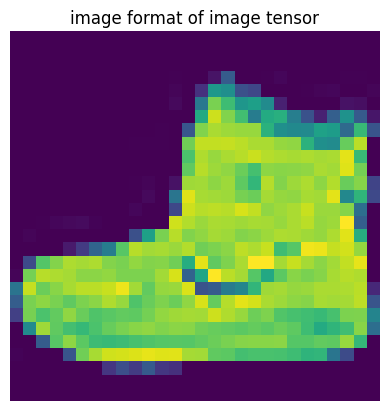

In [19]:
# unpacking image,label and classname
image, label= Train_data[0]
class_name= Train_data.classes

print('image shape:',image.shape)
print('label_num',label)                             #label is int and int dont have shapes
print('label name(class)', class_name[label],'\n')

# plottting the image
plt.imshow(image.squeeze())
plt.axis(False)
plt.title('image format of image tensor')

In [20]:
import pandas as pd

# checking if data is balanced or not

df= pd.DataFrame({
    'targets/label': Train_data.targets,
})

df['targets/label'].value_counts().sort_index()  # Data is balanced & has 10 clasees <-------------- IMPORTANT <-------------------- IMPORTANT <--------------

,count
targets/label,
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000


#Visualizing 16 random trainig images with class names

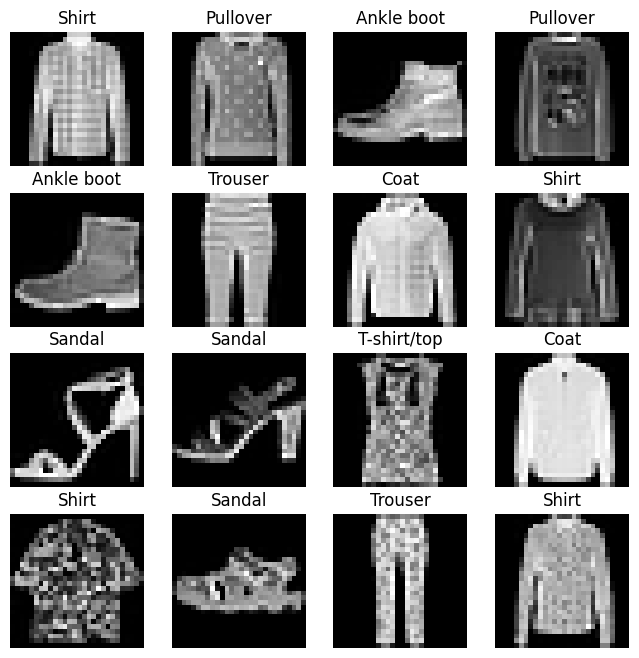

In [21]:

"""                                             This will show 16 random images with it's title(class anme)                                                           """


# Create a blank figure with a 9x9 inch size to hold the subplots (images)
fig= plt.figure(figsize=(8,8))

# Loop 16 times to show 16 images (in a 4x4 grid)
for i in range(1,17):
  # Pick a random index from the training dataset of 60,000 samples
  random_index= torch.randint(0, len(Train_data), size=[1]).item()

  # Get the image and label at that random index
  image, label= Train_data[random_index]
  class_name= Train_data.classes                 # <----- class names list

  #  Add a new subplot (small plot box) to the 4x4 grid at position i
  fig.add_subplot(4, 4, i)
  plt.imshow(image.squeeze(), cmap='grey')
  plt.title(class_name[label])
  plt.axis(False)




#Prepare Dataloader


Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

it loads the data into small batches to be passed through model easily in batches

In [66]:
from torch.utils.data import DataLoader

#dataloader create mini batches of dataset like 32
batch_size= 32

# Turn datasets into iterables (batches)
train_dataloader= DataLoader(
    dataset= Train_data,
    batch_size= batch_size,
    shuffle=True,

    num_workers=0,
    pin_memory=False
)

# Turn datasets into iterables (batches)
test_dataloader= DataLoader(
    dataset=Test_data,
    batch_size=batch_size,
    shuffle=False,

    num_workers= 0,
    pin_memory=False
)

print(f'\n total train batches are: {len(train_dataloader)} & each batch size is: {batch_size}')
print(f'\n total test batches are: {len(test_dataloader)} & each batch size is: {batch_size}')

print('\n',train_dataloader,'\n', test_dataloader)


 total train batches are: 1875 & each batch size is: 32

 total test batches are: 313 & each batch size is: 32



In [41]:
#  checking what's inside both train & test dataloader since they're made of datasets
# print(next(iter(train_dataloader)))   # ---> this will give 1st batch(32) of image(feature) & label

# unpacking train_dataloader and test_dataloader like we did before with fashionmnist dataset
train_feature_batch, train_label_batch= next(iter(train_dataloader))

test_feature_batch, test_label_batch= next(iter(test_dataloader))

# check shape of batch bcz it includes batch size.
train_feature_batch.shape, train_label_batch.shape,  test_feature_batch.shape, test_label_batch.shape

(torch.Size([32, 1, 28, 28]),
 torch.Size([32]),
 torch.Size([32, 1, 28, 28]),
 torch.Size([32]))

image shape: torch.Size([1, 28, 28])
label no 8


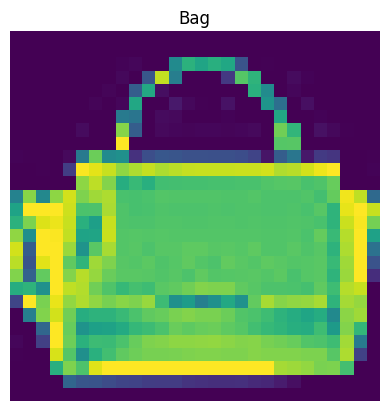

In [62]:
# taking a sample from train batch with label and visualizing it

random_idx= torch.randint(0, len(train_feature_batch), size=[1]).item()

image , label= train_feature_batch[random_idx], train_label_batch[random_idx]
plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis(False)
print('image shape:',image.shape)
print('label no',label.item())